###                  ANÁLISE DE RISCO DE CRÉDITOS
                 
> O Objetivo deste projeto é construir um modelo preditivo para identificar o risco de inadimplência, tipicamente definida pela ocorrência de um atraso maior ou igual a 90 dias em um horizonte de 12 meses. Essa análise basicamente é realizada através de variaveis que podem ser observadas na data de avaliação de crédito, ou seja, quando o cliente solicita o cartão.
> O objetivo da modelagem é desenvolver  o melhor modelo preditivo de modo a auxiliar o cliente a tomar suas próprias decisões referentes a crédito.





ENTENDIMENTO DO NEGÓCIO

> Aqui vamos avaliar o a situação da empresa, segmento, assunto de modo a se entender o tamanho do público, relevância, problemas presentes e todos os detalhes do processo gerador do fenômeno em questão, e portanto dos dados.





ENTENDIMENTO DOS DADOS

Forma fornecidas 15 variaveis mais a variavel resposta (mau = mau pagador). O o significado de cada um dessas variaveis se encontra na tabela.

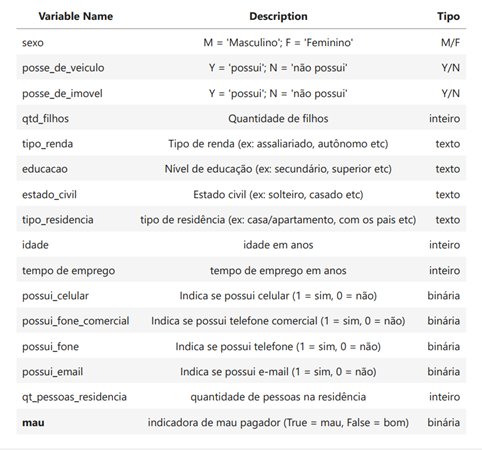

Para uma melhor compreensão do conjunto de dados, vamos explorá-los.

Primeiro, vamos carregar todas as bibliotecas necessárias e ler o arquivo csv com o conjunto de dados.

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('demo01.csv')
print ("Número de linhas e colunas da tabela: {}".format(df.shape))

df.head()

Número de linhas e colunas da tabela: (16650, 16)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


##                        VARIAVEIS UNIVARIADAS

O gráfico de barras é utilizado para avaliar a distribuição de todas as variaveis. Aqui será avaliado a variavel resposta e outras duas variaveis.
Calcularemos também a taxa de indimplente.

False    16260
True       390
Name: mau, dtype: int64

Taxa de inadimplentes:
0.023423423423423424


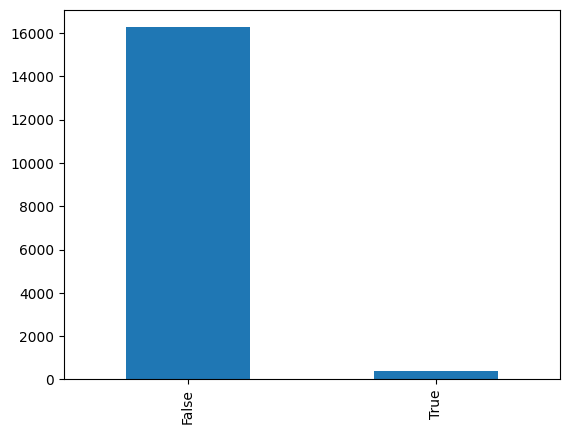

In [3]:
grafico_barras = df['mau'].value_counts().plot.bar()

print(df['mau'].value_counts())
print("\nTaxa de inadimplentes:")
print(df['mau'].mean())

* False são os bons pagadores
* True são os maus pagadores.

<Figure size 640x480 with 0 Axes>

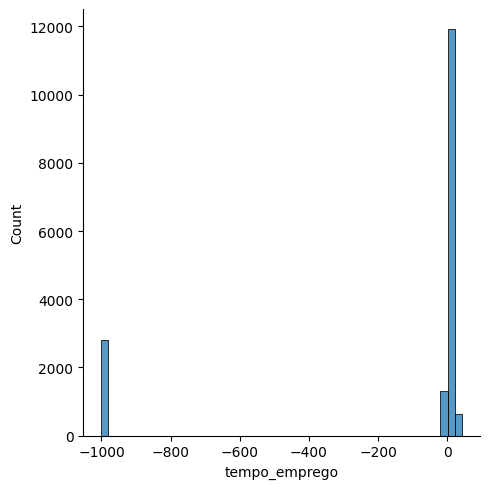

In [4]:
plt.clf()
var = "tempo_emprego"

sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 640x480 with 0 Axes>

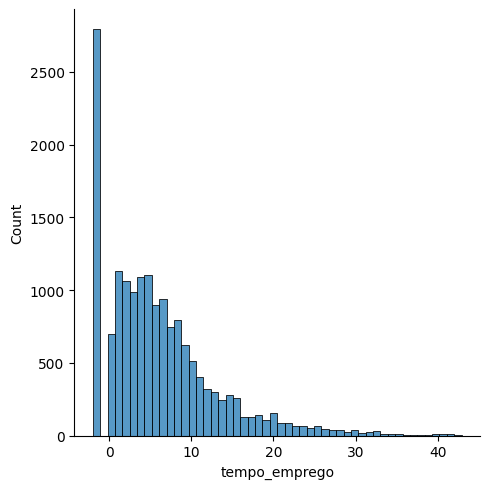

In [5]:
plt.clf()
var = "tempo_emprego"

df.loc[df[var]<0,var] = -2

sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 640x480 with 0 Axes>

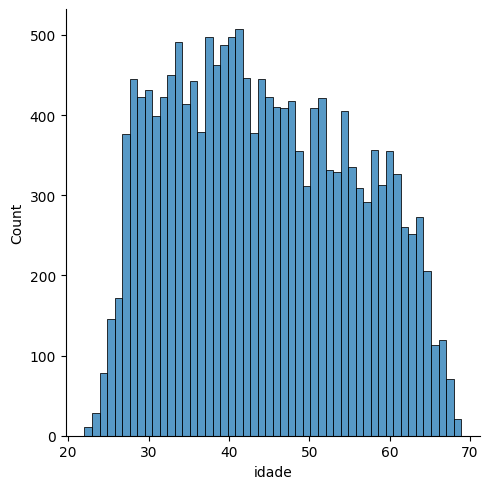

In [6]:
plt.clf()
var = "idade"

df.loc[df[var]<0,var] = -2

sns.displot(df, x = var, bins = 50)
plt.show()

# VARIAVEIS BIVARIADAS

Agora vamos calcular a taxa de indimplencia  (qdt inadimplentes / total) para diferentes grupos definidos pelas variaveis explicativas. Esse calculo tem o objetivo de entender a alteração da inadimplencia indicada pela variável reposta (AtrasoRelevante2anos) e as variaveis explicativas (demais).  



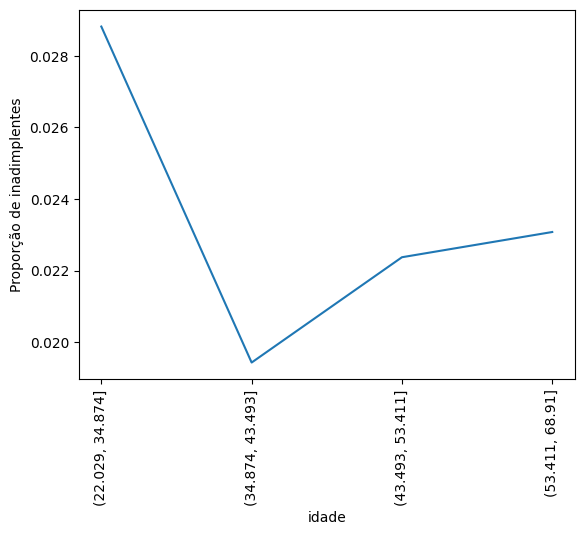

In [7]:
var = 'idade'
cat_srs, bins = pd.qcut(df[var], 4, retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

Nessa etapa precisamos verificar a necessidade das seguintes operações com os dados:


*  Os dados já estão pre-selecionados
*  Precisasmos limpar, identificar e tratar os dados faltantes
*  Aqui não precisaremos construir novas variaveis
*  Como temos apenas uma fonte de dados, não será necessario a integração.
*  No caso de formatação, os nossos dados já estão em formatos úteis

Como os dados já estão pré-selecionados, construidos e integrados, ainda assim temos dados faltantes que serão eliminados na próxima célula.








In [8]:
metadata = pd.DataFrame(df.dtypes, columns = ['tipo'])

metadata['n_categorias'] = 0

for var in metadata.index:
    metadata.loc[var,'n_categorias'] = len(df.groupby([var]).size())

metadata

,tipo,n_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


In [9]:
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [10]:
for var in metadata[metadata['tipo'] == 'object'].index:
    df = convert_dummy(df, var)

In [11]:
df

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,1,...,0,0,0,0,0,0,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,0,1,0,0,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,0,1,0,0,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,1,...,0,0,0,0,0,0,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,0,...,0,1,0,0,0,0,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,0,...,0,0,0,0,0,0,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,1,...,0,0,0,0,0,0,0,0,0,0
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,1,...,0,0,0,0,0,0,0,0,0,0


# MODELAGEM

Nessa etapa, realizaremos a construção do modelo. Os passos típicos são:


*   A técnica de modelagem, selecionaremos a técnica de Floresta Aleatória (Random forest), pois é uma técnica bastante versatil e robusta que captura bem padrões complexos nos dados, relativamente facil dde se usar e que costuma produzir excelentes resultados para uma classificação como estas.

*   Precisamos desenvolver um modelo,mas uma boa prática é dividir a base de dados em duas,uma chamada treinamento,onde o algporitmo "aprende", e outra chamada "teste", onde o algoritmo é avaliado. Essa prática fornece uma métrica de avaliação mais fidedigna do algoritmo.

*   Faremos a avaliaçao do nosso modeloa atravesw do percentual de acerto, avaliando ac classificação do modelo (inadimplente e não inadimplente) e comparando como estado real armazenado na variavel resposta (AtrasoRelevante2anos). Esse é o percentual de acerto é chamado de acurácia



In [12]:
# Tirando a variavel resposta da base de treinamento
x = df.drop("mau",axis = 1)
y = df["mau"]

# Tirando ID da base de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [13]:
x_train

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
5439,0,26.109589,1.178082,1,1,0,0,1.0,1,0,...,0,0,0,1,0,0,0,0,0,0
13539,2,36.071233,8.186301,1,1,1,0,4.0,0,0,...,0,0,0,0,0,0,0,0,0,1
11322,2,37.353425,4.769863,1,0,0,0,4.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1722,0,48.717808,27.328767,1,0,0,0,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0
14166,0,30.361644,9.208219,1,0,0,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7073,0,24.783562,3.293151,1,1,1,1,1.0,1,0,...,0,0,0,1,0,0,0,0,0,1
1419,2,37.936986,1.002740,1,0,1,0,4.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3929,1,35.575342,2.350685,1,0,1,0,3.0,1,1,...,0,0,0,0,0,0,0,0,0,0
14436,0,47.926027,10.120548,1,0,0,1,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


# RODANDO O MODELO

A função RandomForestClassifier gera a estrutura floresta aleatória, e o paramêmtro n_estimador definie o número de árvores na flores.
Normalmente a acurácia do modelo tende a aumentar com o número de árvores, pelo menos até umcerto limite - e aumenta também o recurso computacional demandado.
Então podemos alterar esse parâmetro e o modelo melhor, porém não é recomendado valores muito altos. E sim, a lteração aos poucos, e percebendo como o tempo aumenta com os recursos. Não é necessário ir muito além de umas 100 árvores.


In [14]:
# Treinar uma Random Forest com 5 árvores

clf = RandomForestClassifier(n_estimators=3)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=3)

In [15]:
# Calculando a acuracia

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.74%


In [16]:
# Matriz de confusão

tab = pd.crosstab(index = y_pred, columns = y_test)


In [17]:
tab

mau,False,True
row_0,,
False,4045,68
True,26,24


In [18]:
print(tab[True][0]/(tab[True][0] + tab[False][0]))

0.016532944322878676


In [21]:
print(tab[True][1]/(tab[True][1] + tab[True][0]))

0.2608695652173913


AVALIAÇÃO DOS RESULTADOS

A partir desta parte, será colocado uma avaliação dos dados sobre uma questão, essa avaliação é analisada através da taxa de acurácia.  Porém, sobre todo o contexto do problema do projeto, existem muitas questões que poderiamos aprofundar e realizar mais o comportamento dos dados.
A ideia seria avaliar o impacto do uso do modelo no negócio, ou seja, o quanto o resultado financeiro melhora em detrimento da utilização do modelo.
Então para avaliar o comportamento do modelo, digamos que um cliente bom pagador deixa em média 5 reais de lucro, e um mau pagador deixa em média 100 reais de prejuizo.
Então podemos representar esses dados aplicados a Matriz de Confusão que foi gerada anteriormente.

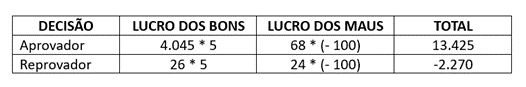

# CONCLUSÃO DO MODELO

Então analisando o valor que seria aprovado, estaríamos evitando um prejuizo de -2.7270 reais, o que na prática significaria um aumento no lucro.